In [1]:
import numpy as np
import pylab
import pynbody
import matplotlib as plt

ImportError: No module named 'pylab'

In [56]:
# importing simulation (or use'/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/' before the given pathname)
f = pynbody.load('h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h329.cosmo50PLK.3072gst5HbwK1BH.004096')

### ---- Applying Past Tutorials ----

In [57]:
h = f.halos() # loading main halos.

h1 = h[1] # setting shortcut.

# checking the number of particles of each type:
print('ngas = %e, ndark = %e, nstar = %e\n'%(len(h1.gas),len(h1.dark),len(h1.star)))
h1.properties['children'];

ngas = 1.364926e+06, ndark = 1.652884e+07, nstar = 1.759582e+07



In [58]:
children = np.array(h1.properties['children'])
print(np.sort(children));

[  11   31   40   59   62   64   76   81   95  119  132  133  137  144
  146  154  169  185  200  208  216  235  238  245  246  250  266  267
  280  282  295  300  331  349  359  361  363  369  375  376  391  396
  406  407  417  425  438  444  447  478  489  519  541  545  547  576
  579  600  604  613  618  620  622  643  645  646  650  656  686  689
  696  708  719  728  729  750  771  782  800  820  836  841  846  851
  864  869  876  891  892  893  908  913  932  934  946  949  955  963
  967  973  996  999 1005 1010 1018 1029 1032 1033 1037 1039 1040 1047
 1060 1080 1098 1100 1102 1106 1115 1116 1122 1133 1141 1152 1155 1172
 1182 1204 1206 1207 1209 1226 1236 1237 1241 1286 1297 1314 1316 1328
 1350 1363 1383 1385 1391 1397 1399 1400 1405 1408 1411 1413 1429 1435
 1444 1466 1471 1474 1484 1488 1497 1499 1500 1503 1505 1506 1509 1513
 1515 1521 1524 1542 1546 1553 1565 1568 1570 1571 1572 1585 1588 1591
 1604 1607 1611 1618 1622 1626 1641 1647 1648 1651 1659 1662 1676 1677
 1678 

In [48]:
# centering snapshot on satellite halo:
h11 = h.load_copy(11) # only load particles within virial radius of halo 11
h11.stars
#pynbody.analysis.halo.center(h11,mode='hyb')

<SimSnap "h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h329.cosmo50PLK.3072gst5HbwK1BH.004096::star" len=5520>

In [49]:
pynbody.analysis.halo.center(h11,mode='com', vel=False)

SimArray([[ 32.41888  ,  35.82514  ,  39.231396 , ..., 133.33533  ,
           121.72786  , 110.12041  ],
          [ 36.019447 ,  39.707985 ,  43.39652  , ..., 135.58769  ,
           123.811035 , 112.03438  ],
          [ 39.62001  ,  43.59083  ,  47.561653 , ..., 137.84009  ,
           125.89421  , 113.94835  ],
          ...,
          [ 17.193256 ,  25.073025 ,  32.952793 , ...,  33.06229  ,
            31.087791 ,  29.11329  ],
          [ 14.476523 ,  21.713501 ,  28.95048  , ...,  25.692314 ,
            24.02973  ,  22.367144 ],
          [ 11.759791 ,  18.353981 ,  24.948166 , ...,  18.322336 ,
            16.971666 ,  15.6209955]], dtype=float32, 'Msol kpc**-3')

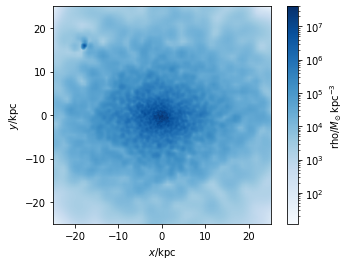

In [59]:
h11.physical_units()

pynbody.plot.image(h11.dm, width=50, cmap='Blues')

In [55]:
f = pynbody.load('/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.\
3072gst5HbwK1BH/snapshots_200bkgdens/h329.cosmo50PLK.3072gst5HbwK1BH.004096')

h2 = h[2]
pynbody.analysis.halo.center(h2,mode='hyb', vel=False)

pynbody.plot.image(h2.gas, width=50, cmap='Blues') # plotting gas of halo 2.

ValueError: Failed to make a sensible logarithmic image. This probably means there are no particles in the view.

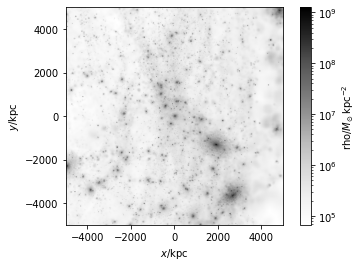

In [42]:
# now creating a plot detailing dark-matter distribution:
pynbody.plot.image(f.d[pynbody.filt.Sphere('10 Mpc')], width='10 Mpc', units = 'Msol \
    kpc^-2', cmap='Greys');

In [60]:
# to align the snapshot edge-on:

pynbody.analysis.angmom.sideon(h1, cen=(0,0,0)); # sideon() centers snapshot by default 
                                                 # unless using keyword 'cen'.
    
# faceon(), and rotate_x() and y,z also exist.

pynbody.plot.image(h1.g, width=100, cmap='Blues');

ValueError: Insufficient particles around center to get velocity

/home/lonzaric/anaconda3/envs/conda-env-py3/lib/python3.8/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


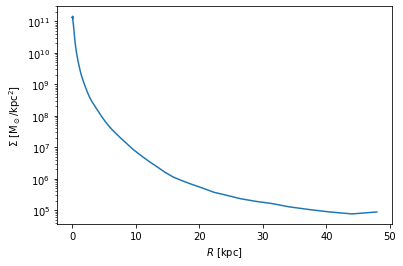

In [47]:
# making a profile of stars:
ps = pynbody.analysis.profile.Profile(h1.s, min = 0.01, max = 50, type = 'log')

pylab.clf()

pylab.plot(ps['rbins'], ps['density']);

pylab.semilogy();

pylab.xlabel('$R$ [kpc]');
pylab.ylabel('$\Sigma$ [M$_\odot$/kpc$^2$]');

/home/lonzaric/anaconda3/envs/conda-env-py3/lib/python3.8/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


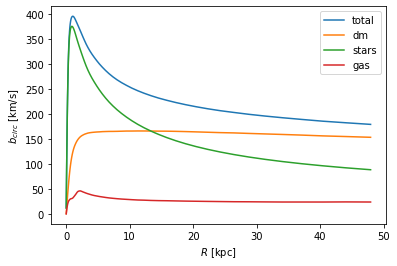

In [46]:
# other profiles like rotation curves:

pylab.figure()

pd = pynbody.analysis.profile.Profile(h1.d, min=.01,max=50, type = 'log')
pg = pynbody.analysis.profile.Profile(h1.g, min=.01,max=50, type = 'log')
p = pynbody.analysis.profile.Profile(h1, min=.01,max=50, type = 'log')

for prof, name in zip([p,pd,ps,pg], ['total', 'dm', 'stars', 'gas']): 
    pylab.plot(prof['rbins'], prof['v_circ'], label=name)

pylab.xlabel('$R$ [kpc]');
pylab.ylabel('$b_{circ}$ [km/s]');

pylab.legend()

### ---- Regarding the Heated Gas ----

In [18]:
f = pynbody.load('h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h329.cosmo50PLK.3072gst5HbwK1BH.004096')

In [20]:
f.loadable_keys() # searching loadable keys for 'coolontime'
simtime = f.properties['time'].in_units('Gyr')

In [19]:
coolontime = h11['coolontime'].in_units('Gyr');

In [33]:
coolontime.units

Unit("Gyr")

In [26]:
heated = h11[coolontime>=simtime]

#heated = h11[pynbody.filt.HighPass('coolontime', f.properties['time'])]

In [40]:
heated.gas['smooth'];
len(heated.gas)

76

In [43]:
image = pynbody.plot.image(h11.gas, width=25, cmap='Blues') # plotting SNe-heated gas.

ValueError: Failed to make a sensible logarithmic image. This probably means there are no particles in the view.

In [25]:
image

NameError: name 'image' is not defined

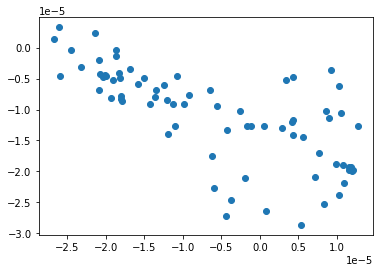

In [24]:
plt.pyplot.scatter(heated.gas['x'],heated.gas['y'])

In [ ]:
pynbody.plot.image(heated.gas, width=25, cmap='Blues', threaded=False);